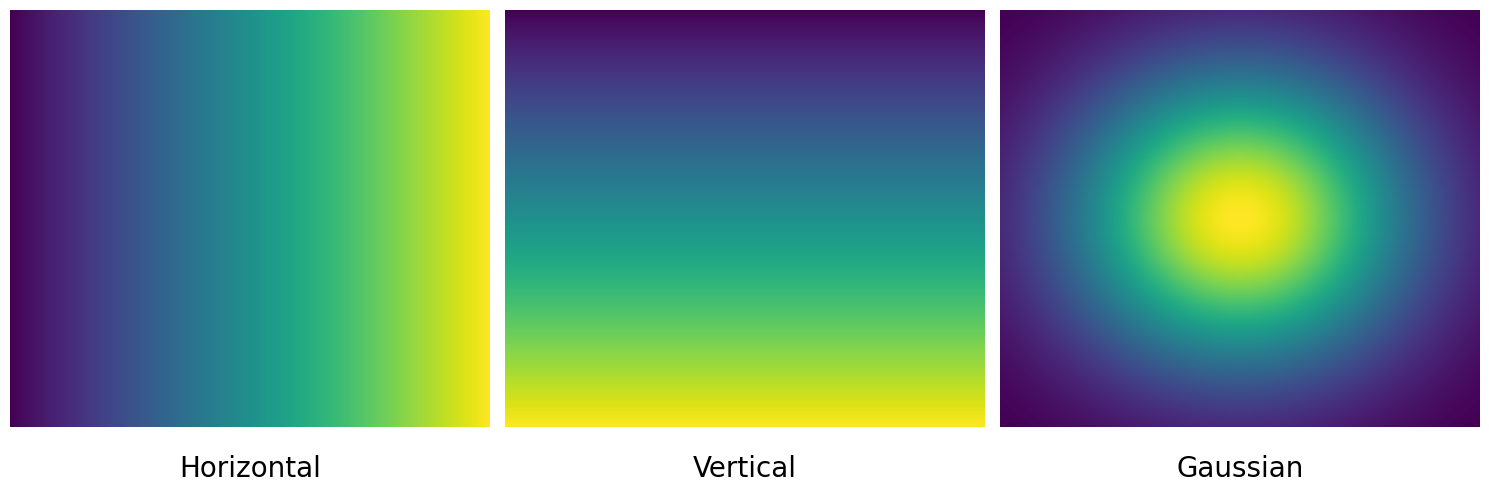

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Function to generate the gradient maps
def generate_gradient_map(H, W, map_type):
    if map_type not in ["Horizontal", "Vertical", "Gaussian"]:
        raise ValueError(f"{map_type} not supported")

    if map_type == "Horizontal":
        gradient = torch.linspace(0, 1, steps=W).repeat(H, 1)
    elif map_type == "Vertical":
        gradient = torch.linspace(0, 1, steps=H).view(H, 1).repeat(1, W)
    elif map_type == "Gaussian":
        x = np.linspace(-1, 1, W)
        y = np.linspace(-1, 1, H)
        xv, yv = np.meshgrid(x, y)
        sigma = 0.5
        gauss = np.exp(-(xv**2 + yv**2) / (2 * sigma**2))
        gradient = torch.tensor(gauss, dtype=torch.float32)

    return gradient

# Function to plot the gradient maps and save as a high-quality PDF
def plot_gradient_maps(H, W, filename):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Define map types
    map_types = ["Horizontal", "Vertical", "Gaussian"]

    for i, map_type in enumerate(map_types):
        # Generate the gradient map
        gradient = generate_gradient_map(H, W, map_type)

        # Plot the gradient map
        ax = axes[i]
        ax.imshow(gradient.numpy(), cmap='viridis', aspect='auto')
        ax.axis('off')  # Hide axes for a cleaner look

        # Add larger text annotation at the bottom of the image
        ax.annotate(f'{map_type}', xy=(0.5, -0.1), xycoords='axes fraction',
                    ha='center', va='center', fontsize=20, color='black')  # Larger font size

    plt.tight_layout()

    # Save the figure with high resolution for paper visualization (e.g., 300 dpi)
    plt.savefig(filename, format='pdf', dpi=300)

    # Show the plot (optional)
    plt.show()

# Call the function with desired image size and save to high-quality PDF
plot_gradient_maps(512, 512, "gradient_maps_high_quality.pdf")  # Save the image as 'gradient_maps_high_quality.pdf'


In [12]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.image import imread

def read_or_blank(path, H, W):
    if os.path.exists(path):
        return imread(path)
    print(f"[warn] missing: {path}")
    return np.zeros((H, W), dtype=float)
    
def plot_gradients_like_example(
    H, W,
    base_path,
    filename="gradients_like_example.pdf",
    row_order=("Gaussian", "Vertical", "Horizontal"),
    timesteps=(999, 899, 749, 499, 136),
    kernel=1,
    header_fontsize=24,   # bigger column headers
    header_pad=22         # extra spacing above headers
):
    import matplotlib.pyplot as plt

    # Big default fonts (titles only matter since axes are off)
    plt.rcParams.update({
        "font.size": header_fontsize,   # baseline font
        "axes.titlesize": header_fontsize,
    })

    fig, axes = plt.subplots(3, 7, figsize=(32, 12))  # wider & taller for print

    # Column headers (top row only)
    col_headers = ["GT"] + [f"Timestep {ts}" for ts in timesteps] + ["Baseline"]
    for c, hdr in enumerate(col_headers):
        axes[0, c].set_title(hdr, fontsize=header_fontsize, pad=header_pad)

    # Rows
    for r, map_type in enumerate(row_order):
        # GT (generated)
        gt = generate_gradient_map(H, W, map_type).numpy()
        ax = axes[r, 0]
        ax.imshow(gt, cmap="viridis", aspect="auto")
        ax.axis("off")

        # Timesteps
        for c, ts in enumerate(timesteps, start=1):
            path = os.path.join(base_path, f"timestep_{ts}_kernel_{kernel}_example_0_{map_type}.png")
            img = read_or_blank(path, H, W)
            ax = axes[r, c]
            ax.imshow(img, cmap="viridis", aspect="auto")
            ax.axis("off")

        # Baseline (t=0) at the end
        baseline_path = os.path.join(base_path, f"timestep_0_kernel_{kernel}_example_0_{map_type}.png")
        base_img = read_or_blank(baseline_path, H, W)
        ax = axes[r, 6]
        ax.imshow(base_img, cmap="viridis", aspect="auto")
        ax.axis("off")

    plt.tight_layout()
    plt.savefig(filename, format="pdf", dpi=400, bbox_inches="tight")  # crisp for papers
    plt.close(fig)

    


In [13]:
# ---- call it ----
base_path = "/home/galkesten/transformers_project/sana_outputs/evals"
plot_gradients_like_example(
    H=512, W=512,
    base_path=base_path,
    filename="gradient_maps_layout.pdf",
    row_order=("Gaussian", "Vertical", "Horizontal"),  # match your screenshot
    timesteps=(999, 899, 749, 499, 136),
    kernel=1
)